# HOUSEKEEPING

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image
from IPython.core.display import HTML  

# DATASCIENCE PROJECT CYCLE

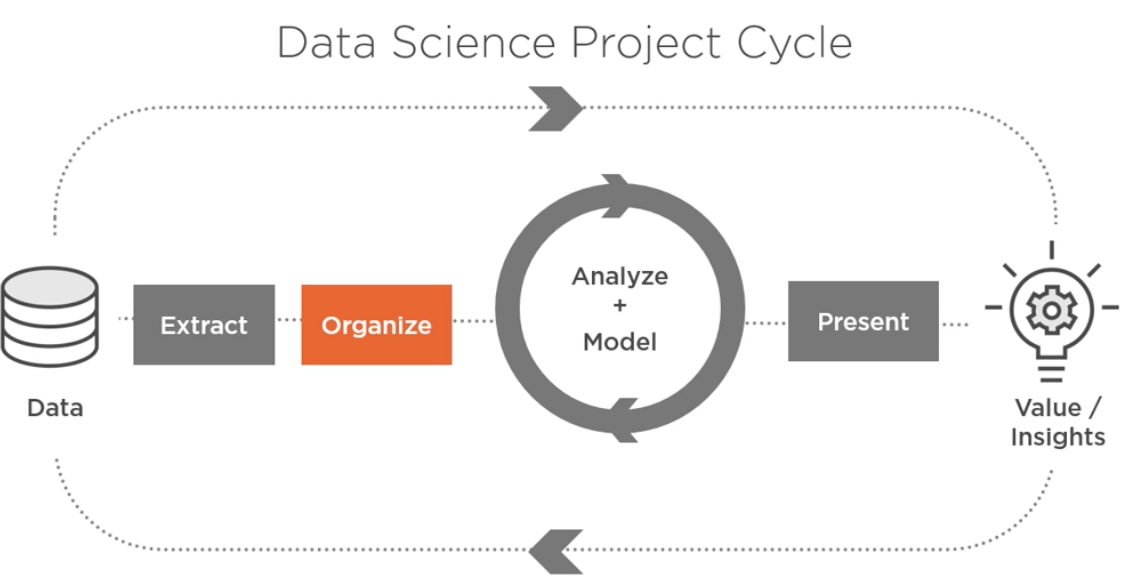

In [3]:
Image(filename='../images/P_DS_ABHISKEK/P2.data_science_project_lifecycle2.png', height=400, width=600)

# EXPLORING AND PROCESSING DATA- PART1

## EXPLORATORY DATA ANALYSIS (EDA)

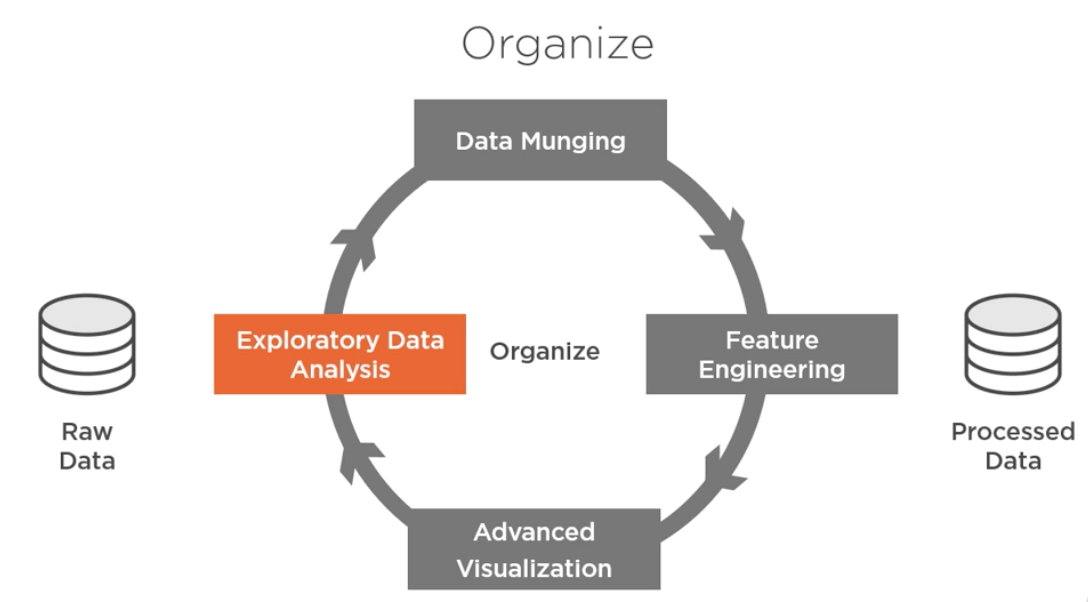

In [5]:
Image(filename='../images/P_DS_ABHISKEK/P3.eda_chart.png', height=400, width=600)

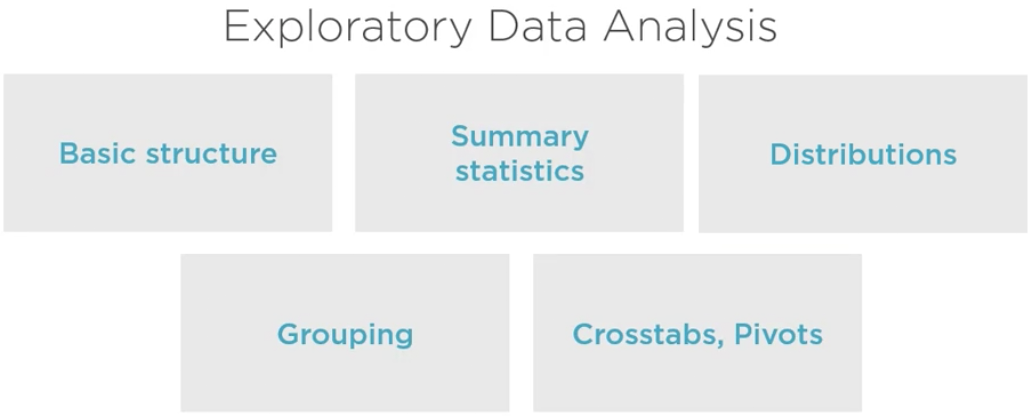

In [7]:
Image(filename='../images/P_DS_ABHISKEK/P4.eda_chart2.png', height=400, width=600)

In [ ]:
EDA -> Basic Structure (observations(rows), features(columns), data types, head/tail )
    -> Summary statistics
        --> Numerical
            ---> Centrality measure(mean, median(middle value))
            ---> Dispersion measure(range(max-min), percentiles, variance, SD)
        --> Categorical
            ---> Total count
            ---> Unique count
            ---> Category counts and proportions
            ---> Per category statistics(grouping)
    -> Distributions
        --> Univariate
            ---> Historgram
            ---> Boxplot
            ---> Kernel Density Estimates(KDE) plot
        --> Bivariate
            ---> Scatter plot
        --> Multivariate
            ---> ???
    -> Grouping
    -> Crosstabs
    -> Pivot table

In [6]:
import pandas as pd
import numpy as np

In [7]:
#WORKS
# !pwd
# OUTPUT: /Users/pinky/Downloads/LEARNING/PLURALSIGHT_Python_data_science_Abhishek_kumar/module2/titanic/notebooks
# !ls /Users/pinky/Downloads/LEARNING/PLURALSIGHT_Python_data_science_Abhishek_kumar/module2/titanic/data/raw
# OUTPUT: gender_submission.csv test.csv              train.csv
    
# path ='/Users/pinky/Downloads/LEARNING/PLURALSIGHT_Python_data_science_Abhishek_kumar/module2/titanic/data/raw'
# train_data = pd.read_csv(path + '/train.csv')

In [199]:
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw') #'../data/raw

train_data_path = os.path.join(raw_data_path, 'train.csv') #'../data/raw/train.csv'
trainDF = pd.read_csv(train_data_path, index_col='PassengerId')

test_data_path = os.path.join(raw_data_path, 'test.csv') #'../data/raw/test.csv'
testDF = pd.read_csv(test_data_path, index_col='PassengerId')

### Combine Train & Test 

In [200]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
testDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [11]:
# Join Train & Test datasets
testDF['Survived'] = -888

In [12]:
testDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
Survived    418 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [201]:
combinedDF = pd.concat((trainDF, testDF), sort=True)  #axis=0 (default)

In [14]:
trainDF.count().tolist(), testDF.count()

([891, 891, 891, 891, 714, 891, 891, 891, 891, 204, 889], Pclass      418
 Name        418
 Sex         418
 Age         332
 SibSp       418
 Parch       418
 Ticket      418
 Fare        417
 Cabin        91
 Embarked    418
 Survived    418
 dtype: int64)

In [15]:
trainDF.keys()

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
trainDF.count().tolist()

[891, 891, 891, 891, 714, 891, 891, 891, 891, 204, 889]

In [17]:
testDF.count().tolist()

[418, 418, 418, 332, 418, 418, 418, 417, 91, 418, 418]

In [18]:
combinedDF.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


### Basic Structure

In [19]:
type(combinedDF.Name)

pandas.core.series.Series

In [20]:
combinedDF.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=1309)

In [21]:
combinedDF.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [22]:
combinedDF.Name[0:5]  #select first 5 from series

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
combinedDF[['Name', 'Age']][6:8]  # select multiple columns

In [24]:
trainDF.loc[800:804] # select based on index values(rows)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
800,0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.00,1,1,345773,24.1500,NaN,S
801,0,2,"Ponesell, Mr. Martin",male,34.00,0,0,250647,13.0000,NaN,S
802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.00,1,1,C.A. 31921,26.2500,NaN,S
803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [25]:
trainDF.iloc[800:804]  #select based on index values(rows) & columns

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
801,0,2,"Ponesell, Mr. Martin",male,34.00,0,0,250647,13.0000,NaN,S
802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.00,1,1,C.A. 31921,26.2500,NaN,S
803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [26]:
trainDF.loc[2:5, ['Age', 'Pclass']]  #select based on index values(rows) & columns

,Age,Pclass
PassengerId,,
2,38.0,1
3,26.0,3
4,35.0,1
5,35.0,3


In [27]:
trainDF.iloc[2:5,3:8] # use iloc for postion based indexing

,Sex,Age,SibSp,Parch,Ticket
PassengerId,,,,,
3,female,26.0,0,0,STON/O2. 3101282
4,female,35.0,1,0,113803
5,male,35.0,0,0,373450


In [28]:
# filter
male_passengers = combinedDF.loc[combinedDF.Sex == 'male']
len(male_passengers)

843

In [29]:
male_passengers.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909


In [30]:
# filter
first_class_male_passengers = combinedDF.loc[(combinedDF.Sex == 'male') & (combinedDF.Pclass == 1)]
len(first_class_male_passengers)

179

### Summary Statistics

In [31]:
combinedDF.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


#### Numerical Features

##### Centrality measures

In [32]:
combinedDF.Age.mean()

29.881137667304014

In [33]:
combinedDF.Age.median()

28.0

##### Dispersion measures

In [34]:
combinedDF.Fare.min(), combinedDF.Fare.max()

(0.0, 512.32920000000001)

In [35]:
combinedDF.Fare.max() - combinedDF.Fare.min()  # range

512.32920000000001

In [36]:
combinedDF.Fare.quantile(0.25), combinedDF.Fare.quantile(0.5), combinedDF.Fare.quantile(0.75)

(7.8958, 14.4542, 31.275)

In [37]:
combinedDF.Fare.var(), combinedDF.Fare.std()  #variance & SD

(2678.959737892894, 51.75866823917414)

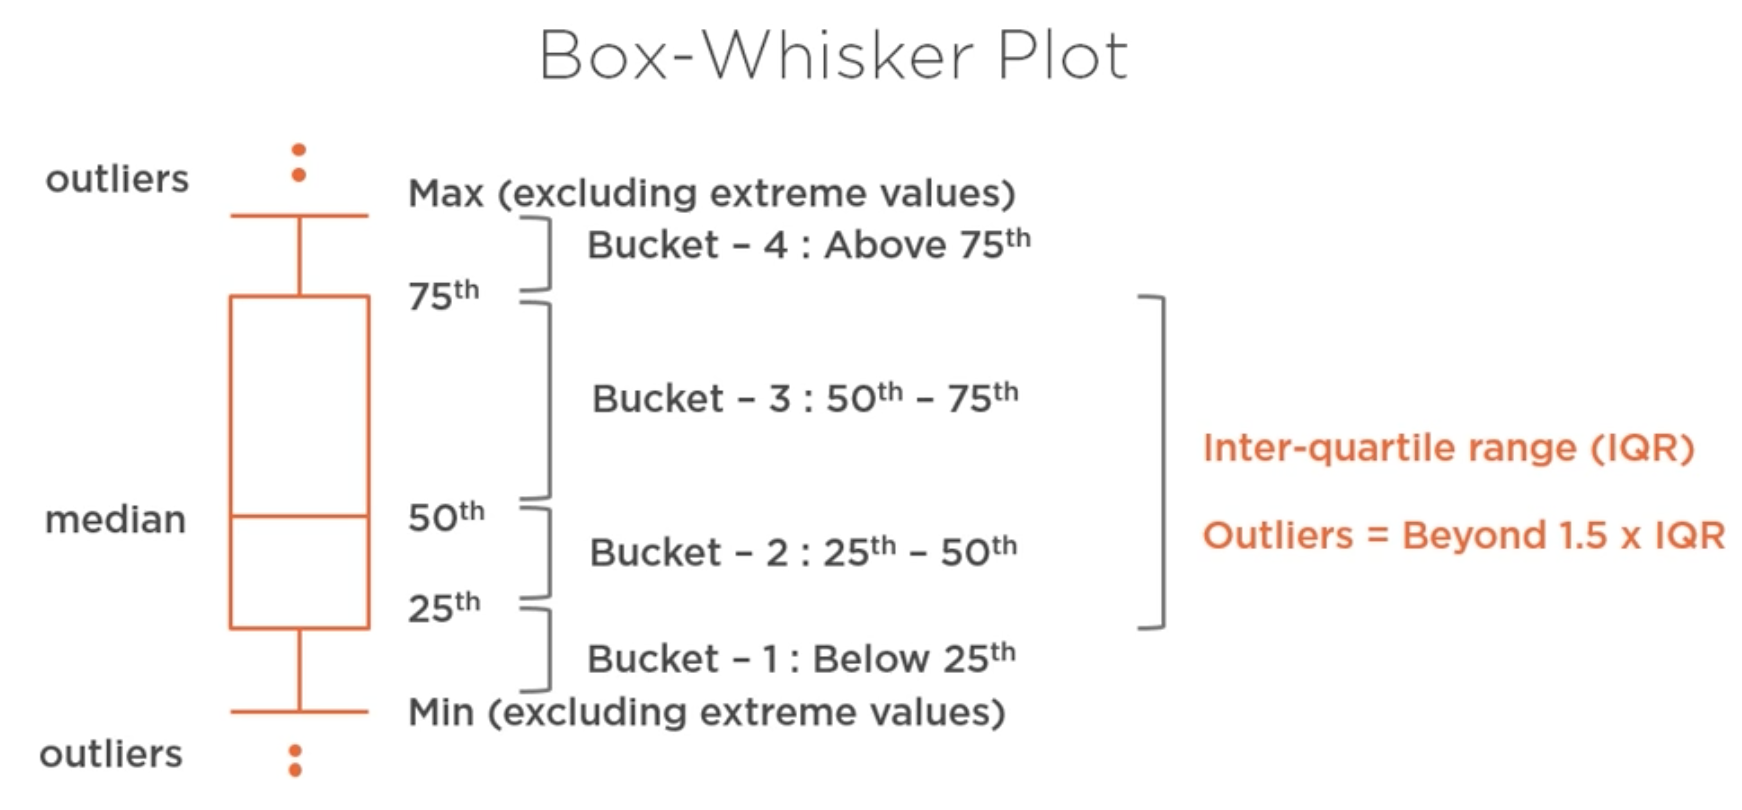

In [8]:
Image(filename='../images/P_DS_ABHISKEK/P5.box_whisker_plot.png', height=400, width=600)

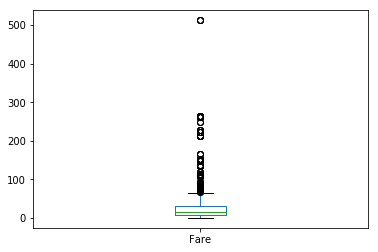

In [39]:
%matplotlib inline
combinedDF.Fare.plot(kind='box')

#### Categorical Features

In [40]:
# Counts
combinedDF.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [41]:
combinedDF.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [42]:
combinedDF.Sex.value_counts(normalize=True) # proportions

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [43]:
combinedDF.Survived.value_counts()

 0      549
-888    418
 1      342
Name: Survived, dtype: int64

In [44]:
combinedDF[combinedDF.Survived != -888].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [45]:
combinedDF.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

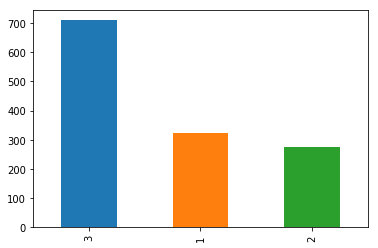

In [46]:
combinedDF.Pclass.value_counts().plot(kind='bar')

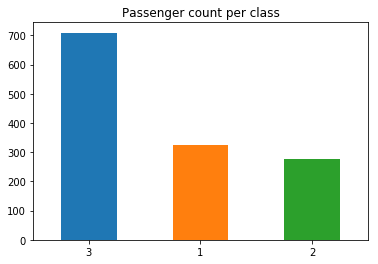

In [47]:
 combinedDF.Pclass.value_counts().plot(kind='bar', rot = 0, title='Passenger count per class');

In [48]:
combinedDF.Embarked.describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

# EXPLORING AND PROCESSING DATA- PART2

### Distributions

#### Univariate: Histogram & KDE (probability based)

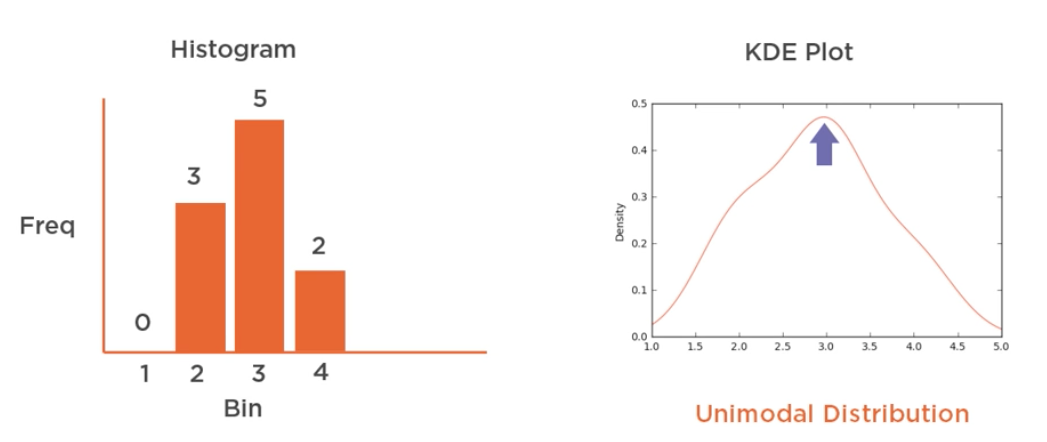

In [9]:
Image(filename='../images/P_DS_ABHISKEK/P6.univariate_distributions.png', height=400, width=600)

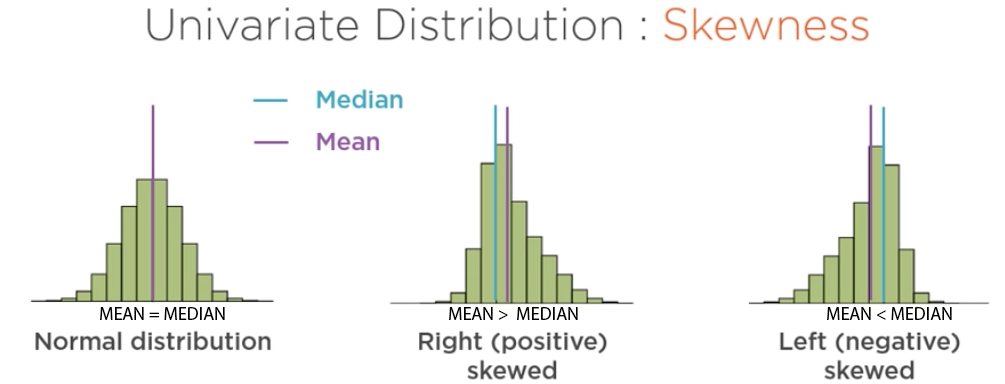

In [10]:
Image(filename='../images/P_DS_ABHISKEK/P7.skewness.png', height=400, width=600)

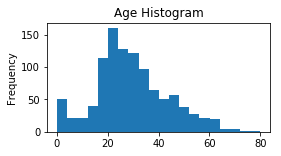

In [51]:
combinedDF.Age.plot(kind='hist', bins=20, title='Age Histogram', figsize=(4,2));

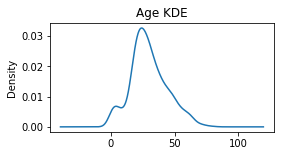

In [52]:
 combinedDF.Age.plot(kind='kde',title='Age KDE', figsize=(4,2));

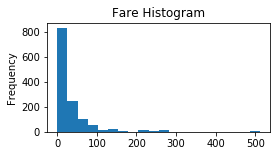

In [53]:
combinedDF.Fare.plot(kind='hist', bins=20, title='Fare Histogram', figsize=(4,2));

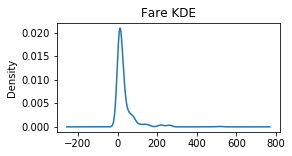

In [54]:
 combinedDF.Fare.plot(kind='kde',title='Fare KDE', figsize=(4,2));

In [55]:
# Compute skewness
combinedDF.Age.skew(), combinedDF.Fare.skew()  # Fare is right sckewed (verymuch > 0) 

(0.40767455974362266, 4.3677091341229222)

#### Bivariate: Scatter plots

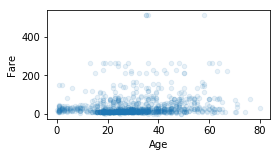

In [56]:
combinedDF.plot.scatter(x='Age', y='Fare', alpha=0.1, figsize=(4,2));

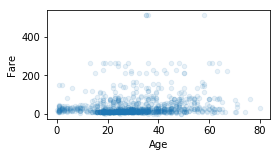

In [57]:
combinedDF.plot.scatter(x='Age', y='Fare', alpha=0.1, figsize=(4,2));

In [58]:
#NOTES: No correlation between Dare & Age

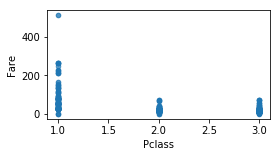

In [59]:
combinedDF.plot.scatter(x='Pclass', y='Fare', alpha=0.3, figsize=(4,2));

In [60]:
#NOTES: Only 3 Pclasses; 
#       In 1st class, some people have got cheap tickets  
#       Passengers in 2nd & 3rd class paid fares between 0 and 100

### Grouping(Aggregarion)

In [61]:
combinedDF.groupby('Sex').mean()  #display app columns

,Age,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,
female,28.687088,46.198097,0.633047,2.154506,0.652361,-289.148069
male,30.585228,26.154601,0.247924,2.372479,0.413998,-280.069988


In [62]:
combinedDF.groupby('Sex').Age.mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [63]:
combinedDF.groupby(['Pclass','Sex'])['Fare', 'Age'].median() # display selected columns

Fare   Age
Pclass Sex                   
1      female  80.92915  36.0
       male    49.50420  42.0
2      female  23.00000  28.0
       male    13.00000  29.5
3      female  10.48960  22.0
       male     7.89580  25.0

In [64]:
combinedDF.groupby(['Pclass']).agg({'Fare':'mean', 'Age':'median'})  # using agg

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [65]:
aggregations = {
    'Fare': {
            'mean_fare' : 'mean' ,
            'max_fare' : max,
            'min_fare' : np.min
            },
    'Age': {
        'range_age' : lambda x: max(x) - min(x)
    }
}

In [66]:
combinedDF.groupby('Pclass').agg(aggregations)

/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                          Age
        mean_fare  max_fare min_fare range_age
Pclass                                        
1       87.508992  512.3292      0.0     79.08
2       21.179196   73.5000      0.0     69.33
3       13.302889   69.5500      0.0     73.83

### Crosstab (for categorical variables)

In [67]:
 pd.crosstab(combinedDF.Sex, combinedDF.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


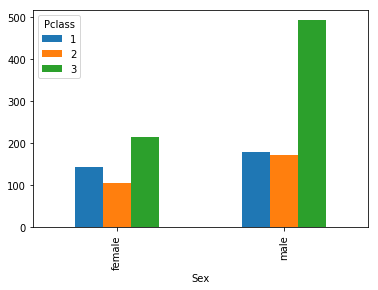

In [68]:
 pd.crosstab(combinedDF.Sex, combinedDF.Pclass).plot(kind='bar')

### Pivot Table

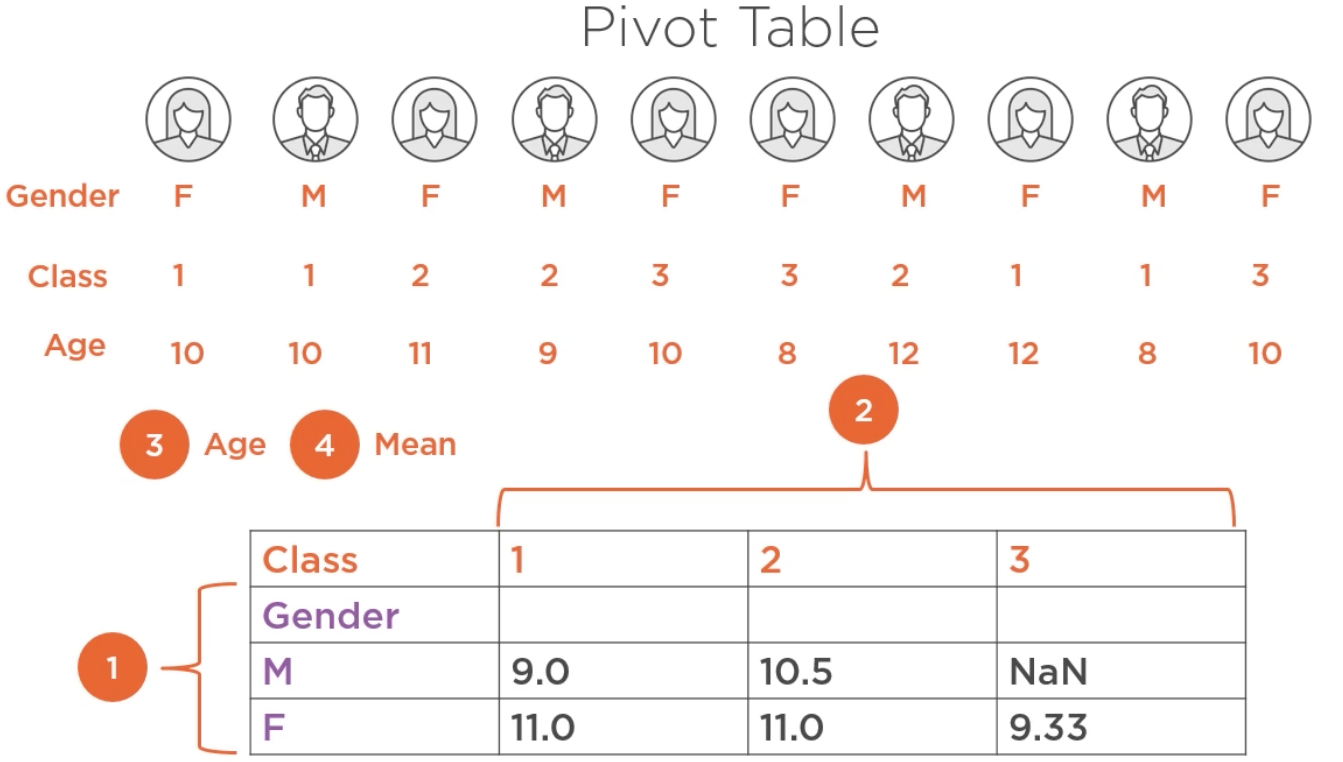

In [11]:
Image(filename='../images/P_DS_ABHISKEK/P8.pivot_table.png', height=300, width=500)

In [70]:
# index --> 1
# cokumns --> 2
# values --> 3
# addfunc --> 4

combinedDF.pivot_table(index='Sex', columns='Pclass', values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [71]:
# Same result as pivot table
combinedDF.groupby(['Sex', 'Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [72]:
# Same result as pivot table
combinedDF.groupby(['Sex', 'Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


# EXPLORING AND PROCESSING DATA- PART3

### DATA MUNGING (missing values, outliers)

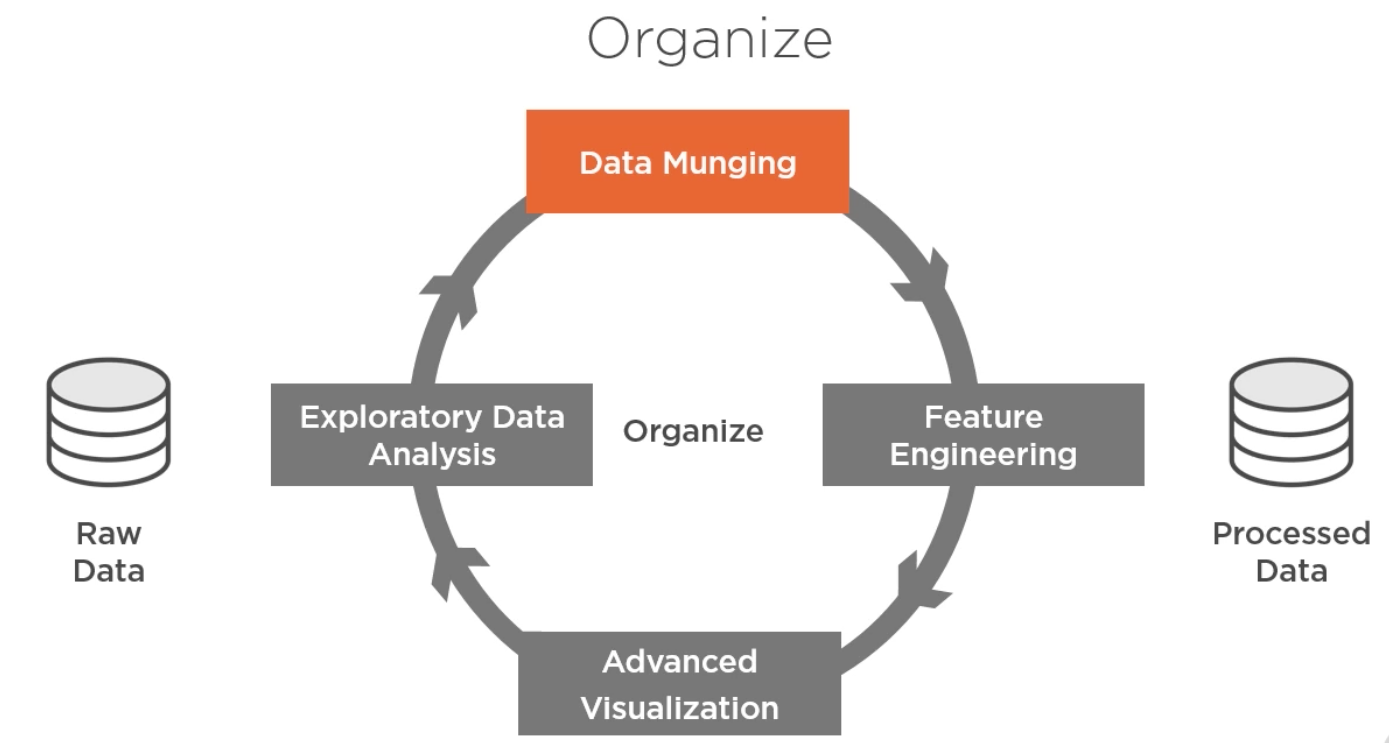

In [12]:
Image(filename='../images/P_DS_ABHISKEK/P9.munging.png', height=300, width=500)

#### Missing values

In [74]:
Issue: inaccurate analysis & most models won't work with missing values
Solution: 
      -> Deletion 
      -> Imputation
         --> Mean imputation  (average) (result IS impacted by outliers)
         --> Median imputation (middle value) (result NOT impacted by outliers)
         --> Mode imputation (most occurring) (for categorical features)
         --> Forward fill (replace with previous value)
         --> Backward fill (replace with next value)
         --> Predictive Model (predict using models)

SyntaxError: invalid syntax (<ipython-input-74-a6ee6a9578e7>, line 1)

In [75]:
combinedDF.info()  # Age, CAbin, Embarked, Fare have missing values (< 1309)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [76]:
len(combinedDF.Embarked.unique())

4

In [77]:
combinedDF.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [78]:
combinedDF.Embarked.value_counts(dropna=False, sort=False)  # BEST RESULT for count unique values including nan's

NaN      2
C      270
S      914
Q      123
Name: Embarked, dtype: int64

In [79]:
combinedDF.Embarked.value_counts().to_frame()

,Embarked
S,914
C,270
Q,123


In [80]:
combinedDF.groupby('Embarked').size() 

Embarked
C    270
Q    123
S    914
dtype: int64

In [81]:
combinedDF.Embarked.nunique(dropna=False)

4

In [82]:
combinedDF[combinedDF.Embarked.isnull()] # BEST RESULT for displaying obervations with nan's

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [83]:
#NOTE: Both the passenger wiht Embarked=NaN survived

In [84]:
# which embarkement point has most survivers?
pd.crosstab(trainDF.Embarked, trainDF.Survived)

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [85]:
combinedDF.groupby(['Survived', 'Embarked']).Embarked.count().to_frame().T

Survived -888           0             1           
Embarked    C   Q    S    C   Q    S    C   Q    S
Embarked  102  46  270   75  47  427   93  30  217

#### DROPPING A COLUMN AND ADDING IT BACK

In [86]:
# WORKS:
# DROPPING A COLUMN AND ADDING IT BACK
# df1 = df2 = df3 = combinedDF.copy()
#df1.Embarked.fillna('X' , inplace = False) # no change to df1; hence waste
#df2.Embarked.fillna('X' , inplace = True) # both NaNs for Embarked is replaced with 'X'; use this always
 
#series1 = df3.Embarked.fillna('X' , inplace = False) # new Series object gets created # same as df3.Embarked  
#df3.drop('Embarked', inplace=True, axis='columns')  # drop column 'Embarked'
#df3['Embarked1'] = series1  # add back the column
#NOTE: series1.index === df3.index

#### Impute missing values 

In [87]:
# NOTE: Use median instead of mean to avoid imppact of extreme values(outliers)

In [88]:
# NOTE: inplace = True will change existing dataframe
#        inplace = False --> pandas will create a copy of existing DF 

##### IMPUTE MISSING VALUE FOR Embarked

In [89]:
#OPTION1 : Replace with mode, as Embarked is a categorical variable
combinedDF.Embarked.mode()

0    S
dtype: object

In [90]:
# Impute missing values 
# combinedDF.loc[combinedDF.Embarked.isnull, 'Embarked'] = 'S'
combinedDF.Embarked.fillna('S', inplace=True)

In [91]:
#OPTION2
# Find out the Fare for each class for each embarkement point; we know the fare paid by passengers 
# with Embarked = NaN is 80; so select the Embarked value class = 1 and with median closest to 80; 
# in this case, it is C (76) 
combinedDF.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [92]:
combinedDF.pivot_table(index='Pclass', columns='Embarked', values='Fare', aggfunc='median')

Embarked,C,Q,S
Pclass,,,
1,76.7292,90.00,52.000
2,15.3146,12.35,15.375
3,7.8958,7.75,8.050


In [202]:
combinedDF.Embarked.fillna('C', inplace=True)

In [203]:
combinedDF[combinedDF.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [95]:
 combinedDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


##### IMPUTE MISSING VALUE FOR Fare

In [96]:
combinedDF[combinedDF.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [97]:
combinedDF.pivot_table(index='Pclass', columns='Embarked', values='Fare', aggfunc='median')

Embarked,C,Q,S
Pclass,,,
1,76.7292,90.00,52.000
2,15.3146,12.35,15.375
3,7.8958,7.75,8.050


In [98]:
combinedDF.pivot_table(index='Pclass', columns='Embarked', values='Fare', aggfunc='mean')

Embarked,C,Q,S
Pclass,,,
1,106.845330,90.000000,72.235825
2,23.300593,11.735114,21.206921
3,11.021624,10.390820,14.435422


In [99]:
combinedDF[(combinedDF['Embarked'] == 'S') & (combinedDF['Pclass'] == 3)].Fare.value_counts(ascending=False).head()

8.0500    60
7.8958    43
7.7750    26
7.9250    23
7.8542    21
Name: Fare, dtype: int64

In [100]:
combinedDF.loc[(combinedDF.Embarked =='S') & (combinedDF.Pclass == 3), 'Fare'].median()

8.05

In [204]:
combinedDF.Fare.fillna(8.05, inplace=True)

In [102]:
combinedDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


##### IMPUTE MISSING VALUE FOR Age

In [103]:
# Count of NaNs for Age column
combinedDF.Age.value_counts(dropna=False, ascending=False).head()

NaN      263
 24.0     47
 22.0     43
 21.0     41
 30.0     40
Name: Age, dtype: int64

In [104]:
combinedDF[combinedDF.Age.isnull()].head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959


In [105]:
combinedDF[combinedDF.Age.isna()].head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959


In [106]:
len(combinedDF[combinedDF.Age.isna()])

263

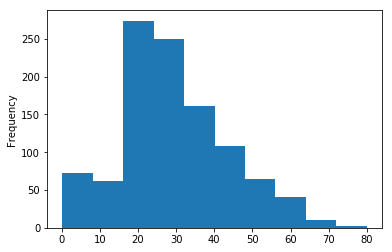

In [107]:
combinedDF.Age.plot(kind='hist');

In [108]:
combinedDF.Age.mean()

29.881137667304014

##### OPTION1 : impute with mean

In [109]:
# OPTION1: impute with mean is not a good option as there are outliers
#combinedDF.Age.fillna(combinedDF.Age.mean, inplace=True)

##### OPTION2: impute with median age per gender

In [110]:
combinedDF.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

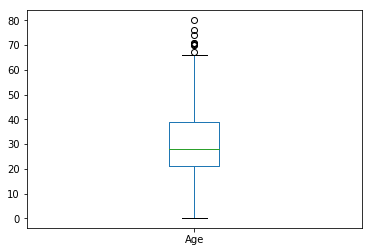

In [111]:
combinedDF.Age.plot.box();

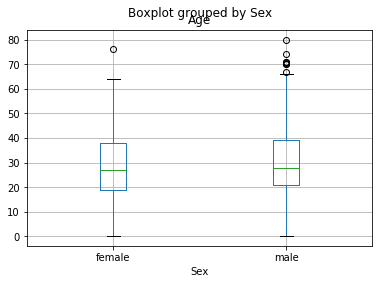

In [112]:
combinedDF.boxplot('Age', 'Sex');

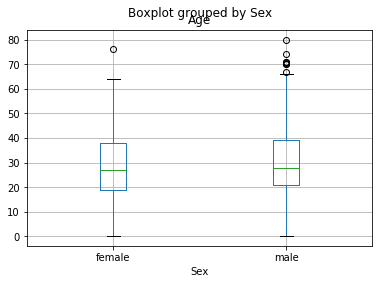

In [113]:
combinedDF[combinedDF.Age.notnull()].boxplot('Age', 'Sex');

In [114]:
# OPTION2: impute with median per sex is not a good option as there no much difference between medians (287 & 28)
# DOESN'T WORK:combinedDF.Age.fillna(combinedDF.groupby('Sex').Age.median(), inplace=True)
# WORKS: combinedDF.Age.fillna(combinedDF.groupby('Sex').Age.transform('median'), inplace=True)

In [115]:
combinedDF.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [116]:
combinedDF.groupby('Sex').Age.transform('median').head()

PassengerId
1    28.0
2    27.0
3    27.0
4    27.0
5    28.0
Name: Age, dtype: float64

In [117]:
df5 = combinedDF.copy()

In [118]:
df5.Age.value_counts(dropna=False).head()

NaN      263
 24.0     47
 22.0     43
 21.0     41
 30.0     40
Name: Age, dtype: int64

In [119]:
df5.Age.fillna(combinedDF.groupby('Sex').Age.median(), inplace=True)

In [120]:
df5.Age.value_counts(dropna=False).head()

NaN      263
 24.0     47
 22.0     43
 21.0     41
 30.0     40
Name: Age, dtype: int64

In [121]:
df5.Age.fillna(combinedDF.groupby('Sex').Age.transform('median'), inplace=True)

In [122]:
df5.Age.value_counts(dropna=False).head()

28.0    217
27.0    108
24.0     47
22.0     43
21.0     41
Name: Age, dtype: int64

##### OPTION3: impute with median per Pclass 

In [123]:
combinedDF.groupby(['Pclass']).Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

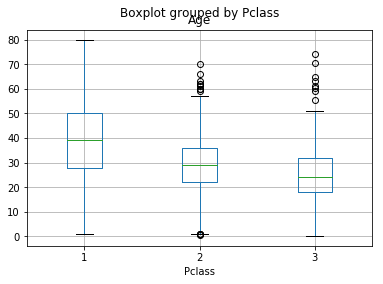

In [124]:
combinedDF.boxplot('Age', 'Pclass')

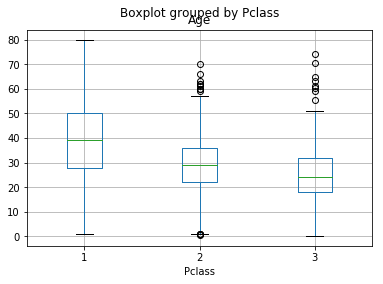

In [125]:
combinedDF[combinedDF.Age.notnull()].boxplot('Age', 'Pclass')

In [126]:
# OPTION3: impute with median Age per Pclass is not a bad choice 
# ombinedDF.Age.fillna(combinedDF.groupby('Pclass').Age.transform('median'), inplace=True)

##### OPTION4: impute with median age based on title(which is part of the name)

In [127]:
combinedDF.Name.head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [128]:
def getTitle(name): 
    fname = name.split(',')[1] 
    #return fname       # ' Mr. Owen Harris'
    title = fname.split('.')[0]
    return title.strip().lower()

In [129]:
getTitle('Braund, Mr. Owen Harris')

'mr'

In [130]:
combinedDF.Name.map(lambda x: getTitle(x)).head()

PassengerId
1      mr
2     mrs
3    miss
4     mrs
5      mr
Name: Name, dtype: object

In [131]:
combinedDF.Name.map(lambda x: getTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [132]:
combinedDF.Name.map(lambda x: getTitle(x)).value_counts(ascending=False).head()

mr        757
miss      260
mrs       197
master     61
dr          8
Name: Name, dtype: int64

In [133]:
combinedDF.Name.map(lambda x: getTitle(x)).unique().tolist()

['mr',
 'mrs',
 'miss',
 'master',
 'don',
 'rev',
 'dr',
 'mme',
 'ms',
 'major',
 'lady',
 'sir',
 'mlle',
 'col',
 'capt',
 'the countess',
 'jonkheer',
 'dona']

In [134]:
title_dictionary = {'mr'	:	'mr',
 'mrs'	:	 'mrs',
 'miss'	:	 'miss',
 'master'	:	 'master',
 'don'	:	 'sir',
 'rev'	:	 'sir',
 'dr'	:	 'officer',
 'mme'	:	 'mrs',
 'ms'	:	 'mrs',
 'major'	:	 'officer',
 'lady'	:	 'lady',
 'sir'	:	 'sir',
 'mlle'	:	 'miss',
 'col'	:	 'officer',
 'capt'	:	 'officer',
 'the countess'	:	 'lady',
 'jonkheer'	:	 'sir',
 'dona'	:	 'lady'}

In [135]:
title_dictionary.keys()

dict_keys(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms', 'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess', 'jonkheer', 'dona'])

In [136]:
title_dictionary.values()

dict_values(['mr', 'mrs', 'miss', 'master', 'sir', 'sir', 'officer', 'mrs', 'mrs', 'officer', 'lady', 'sir', 'miss', 'officer', 'officer', 'lady', 'sir', 'lady'])

In [137]:
title_dictionary.get('dona')

'lady'

In [138]:
combinedDF.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [139]:
def getStandardTitle(title):
    return title_dictionary.get(title)

In [140]:
getStandardTitle('dona')

'lady'

In [141]:
combinedDF['Title'] = combinedDF.Name.map(lambda x: getStandardTitle(getTitle(x)))

In [142]:
combinedDF.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,mr


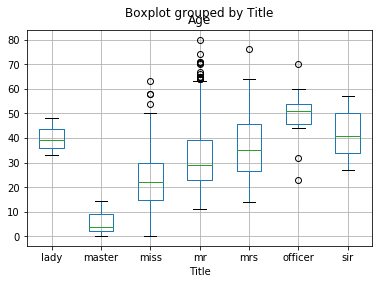

In [143]:
combinedDF.boxplot('Age', 'Title')

In [144]:
combinedDF.Age.value_counts(dropna=False).head()

NaN      263
 24.0     47
 22.0     43
 21.0     41
 30.0     40
Name: Age, dtype: int64

In [145]:
#OPTION4: impute with median age based on title(which is part of the name) is very good choice
combinedDF.Age.fillna(combinedDF.groupby('Title').Age.transform('median'), inplace=True)

In [146]:
combinedDF.Age.value_counts(dropna=False).head()

29.0    206
22.0     93
35.0     51
24.0     47
21.0     41
Name: Age, dtype: int64

In [147]:
combinedDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


In [148]:
# NOTE: Will ignore Cabin feature; hence no work needs to be done

### WORKING WITH OUTLIERS

#### Outlier Detection

#### Outlier Treatment

##### Age

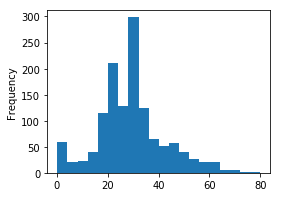

In [149]:
combinedDF.Age.plot(kind='hist', bins=20, figsize=(4,3));

In [150]:
combinedDF.loc[combinedDF.Age>70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877,mrs


##### Fare

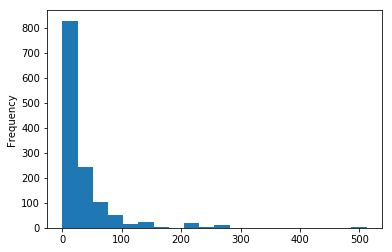

In [151]:
combinedDF.Fare.plot(kind='hist', bins=20)

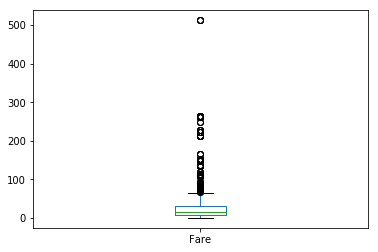

In [152]:
combinedDF.Fare.plot(kind='box')

In [153]:
combinedDF.loc[combinedDF.Fare == combinedDF.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,mrs


In [154]:
logFare = np.log(combinedDF.Fare + 1.0) # 1.0 is added to accommodate 0 fares (log(0) is undefined

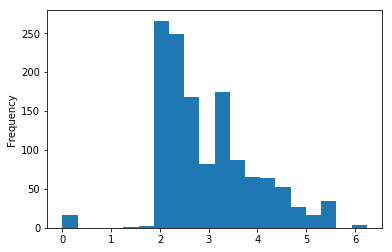

In [155]:
logFare.plot(kind='hist' ,bins=20)

#### Binning

In [156]:
#TO DO: # NOT WORKINGcombinedDF.qcut(combinedDF.Fare, 4)

### FEATURE ENGINEERING

##### New Feature: Adult

In [157]:
combinedDF['Adult'] = np.where(combinedDF.Age >= 18, 'Yes', 'No')

In [158]:
combinedDF.Adult.value_counts()

Yes    1147
No      162
Name: Adult, dtype: int64

In [159]:
pd.crosstab(combinedDF[combinedDF.Survived != -888].Survived, combinedDF[combinedDF.Survived != -888].Adult)

Adult,No,Yes
Survived,,
0,54,495
1,63,279


##### New Feature: Family size

In [160]:
combinedDF['FamilySize'] =  combinedDF.Parch + combinedDF.SibSp  + 1 # 1 for self

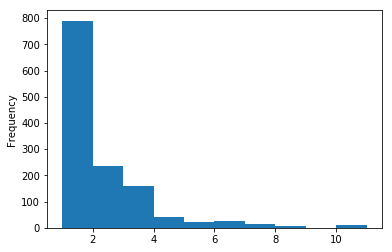

In [161]:
combinedDF['FamilySize'].plot(kind='hist')

In [162]:
pd.crosstab(combinedDF[combinedDF.Survived != -888].Survived, combinedDF[combinedDF.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


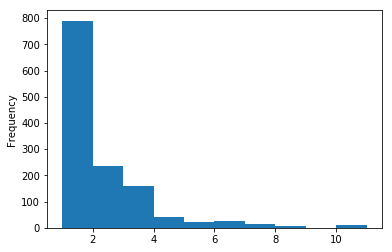

In [163]:
combinedDF.FamilySize.plot(kind='hist')

In [164]:
combinedDF.loc[combinedDF.FamilySize >10]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Adult,FamilySize
PassengerId,,,,,,,,,,,,,,
160,4.0,NaN,S,69.55,"Sage, Master. Thomas Henry",2,3,male,8,0,CA. 2343,master,No,11
181,22.0,NaN,S,69.55,"Sage, Miss. Constance Gladys",2,3,female,8,0,CA. 2343,miss,Yes,11
202,29.0,NaN,S,69.55,"Sage, Mr. Frederick",2,3,male,8,0,CA. 2343,mr,Yes,11
325,29.0,NaN,S,69.55,"Sage, Mr. George John Jr",2,3,male,8,0,CA. 2343,mr,Yes,11
793,22.0,NaN,S,69.55,"Sage, Miss. Stella Anna",2,3,female,8,0,CA. 2343,miss,Yes,11
847,29.0,NaN,S,69.55,"Sage, Mr. Douglas Bullen",2,3,male,8,0,CA. 2343,mr,Yes,11
864,22.0,NaN,S,69.55,"Sage, Miss. Dorothy Edith ""Dolly""",2,3,female,8,0,CA. 2343,miss,Yes,11
1080,22.0,NaN,S,69.55,"Sage, Miss. Ada",2,3,female,8,-888,CA. 2343,miss,Yes,11
1234,29.0,NaN,S,69.55,"Sage, Mr. John George",9,3,male,1,-888,CA. 2343,mr,Yes,11


##### New feature: IsMother

In [165]:
combinedDF['IsMother'] = np.where(((combinedDF.Sex == 'female') & 
                                  (combinedDF.Title != 'miss') & 
                                  (combinedDF.Age > 18) &
                                  (combinedDF.Parch > 0)), 1,0)

In [166]:
combinedDF.IsMother.value_counts()

0    1224
1      85
Name: IsMother, dtype: int64

In [167]:
pd.crosstab(combinedDF[combinedDF.Survived != -888].Survived, combinedDF[combinedDF.Survived != -888].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


##### New Feature: Deck

In [168]:
combinedDF.Cabin.value_counts().head()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
B96 B98            4
F33                4
Name: Cabin, dtype: int64

In [169]:
combinedDF.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [170]:
combinedDF.loc[combinedDF.Cabin =='T']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Adult,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,mr,Yes,1,0


In [171]:
combinedDF.loc[combinedDF.Cabin =='T', 'Cabin'] = np.NaN

In [172]:
combinedDF.loc[combinedDF.Cabin =='T']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Adult,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,


In [173]:
def getDeck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')

In [174]:
combinedDF['Deck'] = combinedDF.Cabin.map(lambda x: getDeck(x))

In [175]:
combinedDF.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [176]:
pd.crosstab(combinedDF[combinedDF.Survived != -888].Survived, combinedDF[combinedDF.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [177]:
combinedDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 16 columns):
Age           1309 non-null float64
Cabin         294 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Title         1309 non-null object
Adult         1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int64
Deck          1309 non-null object
dtypes: float64(2), int64(6), object(8)
memory usage: 213.9+ KB


#### FEATURE ENCODING (for categorical features)

In [ ]:
Feature encoding methods  
    -> Binary Encoding (only 2 possible values for the feature)
       --> You can use np.where or One-Hot encoding 
    -> Label Encoding (multi category feature)
        --> Use integers to encode each level 
        --> Ex: Fare can be low(=1) , medium(=2), high(=3) 
        --> ML algoritm will consider High > Low beacuse 3 > 1
        --> Use label encoding for ordered categories(when you feature has some 
            kind of ascending/descending order(Ex: Fare))
    -> One-Hot Encoding
        --> Add 'n' features(columns) for each categories of your existing feature
        --> Ex: Embarkment(S, C, Q): Create new 3 features -> Is_S, Is_C, Is_Q 
        --> Use pd.get_dummies (After encoding, the original column is dropped automatically)

In [179]:
combinedDF.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

##### New Feature: IsMale (binary feature)
    

In [180]:
combinedDF['IsMale'] = np.where(combinedDF.Sex == 'male', 1,0)

In [181]:
combinedDF.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Ticket', 'Title', 'Adult', 'FamilySize',
       'IsMother', 'Deck', 'IsMale'],
      dtype='object')

##### New feature: for Deck, Pclass, Title, Fare_Bin, Embarked, Adult

In [182]:
combinedDF = pd.get_dummies(combinedDF, columns=['Deck', 'Pclass', 'Title', 'Embarked', 'Adult'])

In [183]:
combinedDF.columns

Index(['Age', 'Cabin', 'Fare', 'Name', 'Parch', 'Sex', 'SibSp', 'Survived',
       'Ticket', 'FamilySize', 'IsMother', 'IsMale', 'Deck_A', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_Z', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Title_lady', 'Title_master', 'Title_miss',
       'Title_mr', 'Title_mrs', 'Title_officer', 'Title_sir', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Adult_No', 'Adult_Yes'],
      dtype='object')

#### Drop and Reorder column

In [184]:
combinedDF.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1, inplace=True)

In [185]:
len(combinedDF.columns)

29

In [186]:
# Reorder columns
t_columns = combinedDF.columns.tolist()
t_columns.remove('Survived')
t_columns.sort()
#t_columns.append('Survived') # this adds Survived at the end
t_columns = ['Survived'] + t_columns

In [187]:
combinedDF = combinedDF[t_columns]

In [188]:
combinedDF.columns

Index(['Survived', 'Adult_No', 'Adult_Yes', 'Age', 'Deck_A', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_Z',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'Fare',
       'IsMale', 'IsMother', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_lady',
       'Title_master', 'Title_miss', 'Title_mr', 'Title_mrs', 'Title_officer',
       'Title_sir'],
      dtype='object')

#### SAVE DATAFRAME TO FILE

In [190]:
import os
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed') #'../data/processed
write_train_data_path = os.path.join(processed_data_path, 'train.csv') #'../data/processed/train.csv' 
combinedDF.loc[combinedDF.Survived != -888].to_csv(write_train_data_path)

In [191]:
write_test_data_path = os.path.join(processed_data_path, 'test.csv') #'../data/processed/test.csv' 
combinedDF.loc[combinedDF.Survived == -888].to_csv(write_test_data_path) 

In [13]:
# END